# Opioids Project: Analysis

Ra'Kira Nelson and Alexa Fahrer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [2]:
opioids = pd.read_csv("opioids_clean.csv")
opioids = opioids.copy()
opioids = opioids.drop(columns=["Unnamed: 0"])
opioids

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,608.685973,8.385514
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,641.909781,10.226463
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,670.836935,9.596198
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,690.868880,12.149912
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,739.373276,8.051897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,55133,WAUKESHA,"Waukesha County, WI",WAUKESHA COUNTY,WISCONSIN,WI,2015,200375.123762,34.0,396377.0,0,1,505.516525,8.577692
2620,55133,WAUKESHA,NaN,NaN,NaN,WI,2016,192636.391662,NaN,NaN,0,1,NaN,NaN
2621,55133,WAUKESHA,NaN,NaN,NaN,WI,2017,154116.663589,NaN,NaN,0,1,NaN,NaN
2622,55133,WAUKESHA,NaN,NaN,NaN,WI,2018,126187.189934,NaN,NaN,0,1,NaN,NaN


## Control States

In [3]:
control_states = ["KENTUCKY", "ALABAMA", "TENNESSEE"]
opioids_states = opioids[opioids["state"].isin(control_states + ["FLORIDA"])]
opioids_states

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,608.685973,8.385514
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,641.909781,10.226463
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,670.836935,9.596198
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,690.868880,12.149912
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,739.373276,8.051897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,47157,SHELBY,"Shelby County, TN",SHELBY COUNTY,TENNESSEE,TN,2011,316655.826468,83.0,933321.0,0,1,339.278583,8.892975
2252,47157,SHELBY,"Shelby County, TN",SHELBY COUNTY,TENNESSEE,TN,2012,330581.061846,118.0,939421.0,0,1,351.898735,12.560928
2253,47157,SHELBY,"Shelby County, TN",SHELBY COUNTY,TENNESSEE,TN,2013,315564.761928,121.0,938713.0,0,1,336.167457,12.889989
2254,47157,SHELBY,"Shelby County, TN",SHELBY COUNTY,TENNESSEE,TN,2014,312157.916524,138.0,937949.0,0,1,332.809051,14.712953


## Plots

### Pre-Trend Checks: Florida vs Control States

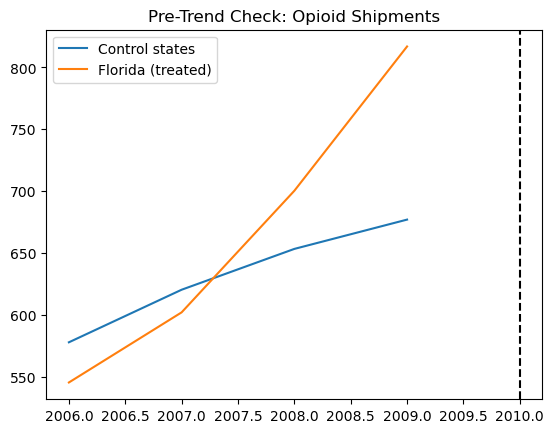

In [4]:
pre = opioids_states[opioids_states["year"] < 2010]

mean_trends = (
    pre.groupby(["policy_state", "year"])["prescriptions_per_1000"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["prescriptions_per_1000"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Shipments")
plt.show()

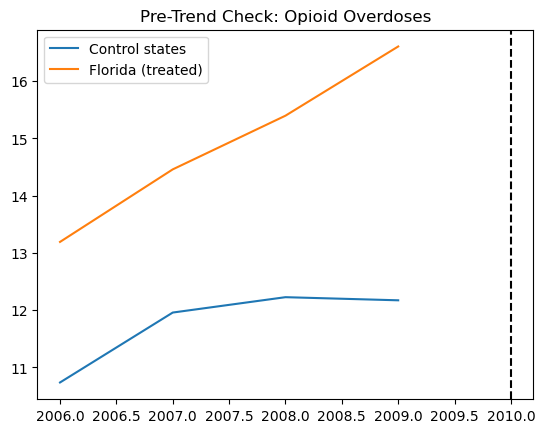

In [5]:
pre = opioids_states[opioids_states["year"] < 2010]

mean_trends = (
    pre.groupby(["policy_state", "year"])["overdose_per_100k"].mean().reset_index()
)

for group, d in mean_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    plt.plot(d["year"], d["overdose_per_100k"], label=label)

plt.axvline(2010, color="black", linestyle="--")
plt.legend()
plt.title("Pre-Trend Check: Opioid Overdoses")
plt.show()

### Pre-Post: Florida

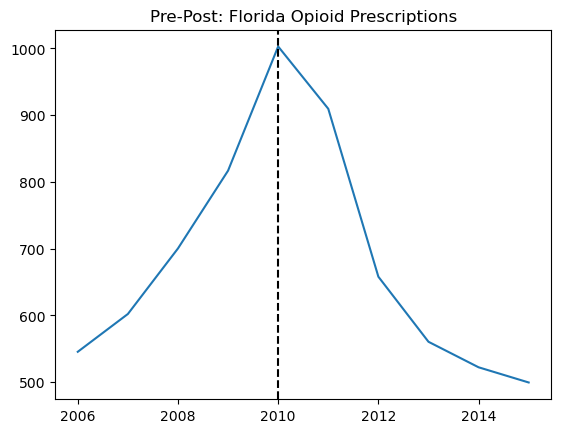

In [6]:
fl = opioids_states[opioids_states["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Prescriptions")
plt.show()

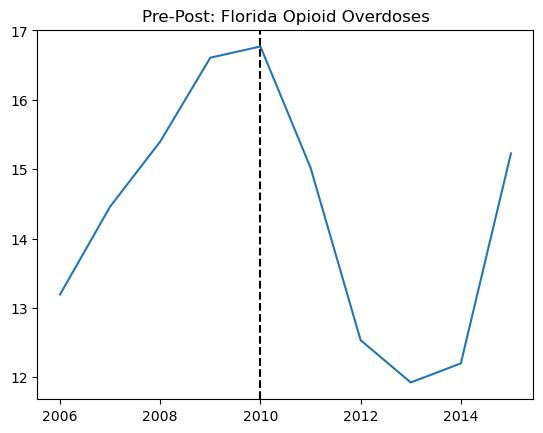

In [7]:
fl = opioids_states[opioids_states["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.show()